In [ ]:
system("pip3 install kb-python")
system("wget https://github.com/pachterlab/kallisto/releases/download/v0.46.1/kallisto_linux-v0.46.1.tar.gz")
untar("kallisto_linux-v0.46.1.tar.gz")
system("cp kallisto/kallisto /usr/local/bin")

In [ ]:
install.packages("caTools")
install.packages("ggplot2")
install.packages("scatterplot3d")
install.packages("rgl")
install.packages("magrittr") # package installations are only needed the first time you use it
install.packages("dplyr") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘htmlwidgets’, ‘crosstalk’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#librerías utilizadas
library(caTools)

#Librería de gráficos
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

   # alternative installation of the %>%
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Entendimiento de los Datos

Con el fin de analizar y tratar de predecir la masa corporal

- Age (edad): 
- bodyFat 

In [ ]:
masa <- read.csv('sample_data/bodyfat.csv', header = T, na.strings = '?')
masa <- masa %>% na.omit() %>% select(sort(names(.)), -Density)
#Utilice la función str() para ver la estructura del conjunto de datos:
print("----------------------------------------------summary---------------------------------------")
summary(masa)


[1] "----------------------------------------------summary---------------------------------------"


    Abdomen            Age            Ankle          Biceps     
 Min.   : 69.40   Min.   :22.00   Min.   :19.1   Min.   :24.80  
 1st Qu.: 84.58   1st Qu.:35.75   1st Qu.:22.0   1st Qu.:30.20  
 Median : 90.95   Median :43.00   Median :22.8   Median :32.05  
 Mean   : 92.56   Mean   :44.88   Mean   :23.1   Mean   :32.27  
 3rd Qu.: 99.33   3rd Qu.:54.00   3rd Qu.:24.0   3rd Qu.:34.33  
 Max.   :148.10   Max.   :81.00   Max.   :33.9   Max.   :45.00  
    BodyFat          Chest           Forearm          Height     
 Min.   : 0.00   Min.   : 79.30   Min.   :21.00   Min.   :29.50  
 1st Qu.:12.47   1st Qu.: 94.35   1st Qu.:27.30   1st Qu.:68.25  
 Median :19.20   Median : 99.65   Median :28.70   Median :70.00  
 Mean   :19.15   Mean   :100.82   Mean   :28.66   Mean   :70.15  
 3rd Qu.:25.30   3rd Qu.:105.38   3rd Qu.:30.00   3rd Qu.:72.25  
 Max.   :47.50   Max.   :136.20   Max.   :34.90   Max.   :77.75  
      Hip             Knee            Neck           Thigh      
 Min.   : 85.0   M

In [ ]:
masa$Height <-(masa$Height * 0.0254)

In [ ]:
masa$Weight <-masa$Weight * 0.453592

In [ ]:
masa$imc <- masa$Weight / (masa$Height * masa$Height) 

In [ ]:
# Eliminar columnas de un dataframe
borrar <- c("Density","Age", "Neck", "Chest", "Hip", "Abdomen", "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")
masa <- masa[ , !(names(masa) %in% borrar)]
head(masa, n=9)

BodyFat Height  Weight   imc     
1 12.3    1.72085 69.96657 23.62678
2  6.1    1.83515 78.58481 23.33434
3 25.3    1.68275 69.85317 24.66874
4 10.4    1.83515 83.80112 24.88323
5 28.7    1.80975 83.57433 25.51736
6 20.9    1.89865 95.36772 26.45523
7 19.2    1.77165 82.10015 26.15701
8 12.4    1.84150 79.83219 23.54153
9  4.1    1.87960 86.63607 24.52268

In [ ]:
str(masa)

'data.frame':	252 obs. of  4 variables:
 $ BodyFat: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ Height : num  1.72 1.84 1.68 1.84 1.81 ...
 $ Weight : num  70 78.6 69.9 83.8 83.6 ...
 $ imc    : num  23.6 23.3 24.7 24.9 25.5 ...


In [ ]:
#splitting data into training and testing
set.seed(101)

index <- sample(1: nrow(masa), 0.7 * nrow(masa))
train <- masa[index,]
test <- masa[-index,]

In [ ]:
str(train)
str(test)

'data.frame':	176 obs. of  4 variables:
 $ BodyFat: num  8.5 20.4 16.9 9 30.2 9.6 8.6 33.6 26.1 20.4 ...
 $ Height : num  1.87 1.73 1.82 1.89 1.79 ...
 $ Weight : num  72.9 82.3 79.9 83.6 97.7 ...
 $ imc    : num  20.8 27.6 24.2 23.3 30.5 ...
'data.frame':	76 obs. of  4 variables:
 $ BodyFat: num  12.4 7.1 20.8 20.9 22.9 19.1 15.6 14 7.9 3.7 ...
 $ Height : num  1.84 1.89 1.77 1.68 1.8 ...
 $ Weight : num  79.8 84.5 81.9 73.8 94.9 ...
 $ imc    : num  23.5 23.6 26.3 26.3 29.2 ...


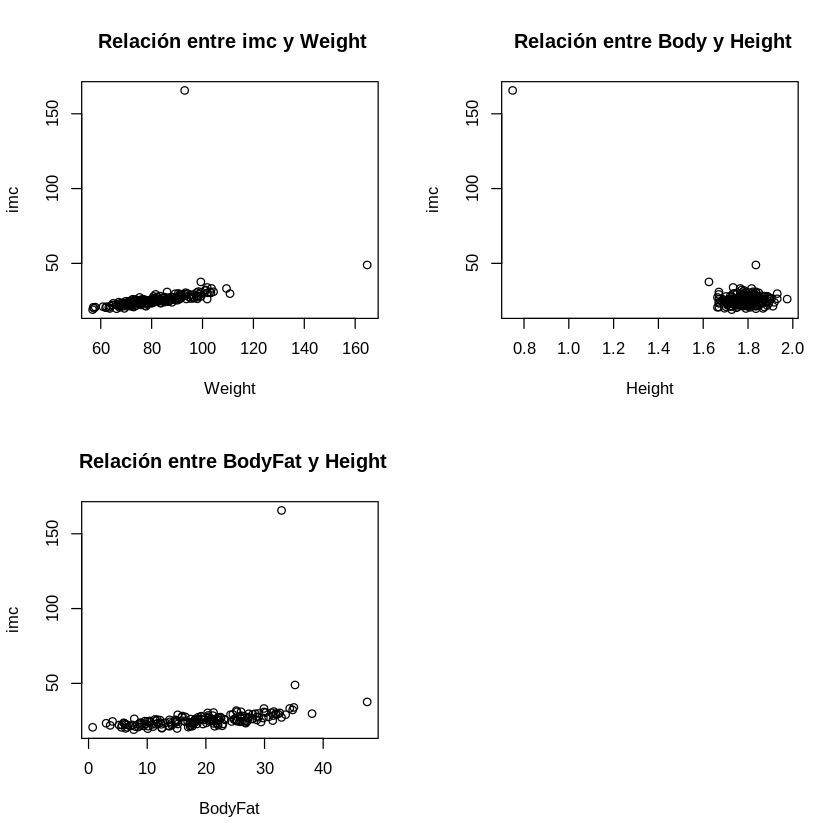

In [ ]:
par(mfrow = c(2,2)) #crear una cuadrícula de 2 columnas y 2 hileras para ver cuatro gráficos.

plot(x = train$Weight, y = train$imc, main = ' Relación entre imc y Weight', ylab = 'imc', xlab = 'Weight')
plot(x = train$Height, y = train$imc, main = ' Relación entre Body y Height', ylab = 'imc', xlab = 'Height')
plot(x = train$BodyFat, y = train$imc, main = ' Relación entre BodyFat y Height', ylab = 'imc', xlab = 'BodyFat')

In [ ]:
reg.imc <- lm(imc ~ Weight + Height, data = train)

summary(reg.imc)


Call:
lm(formula = imc ~ Weight + Height, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.329  -2.820  -0.659   2.719  35.959 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 155.90589    6.27202   24.86   <2e-16 ***
Weight        0.48215    0.02778   17.35   <2e-16 ***
Height      -94.86258    3.62151  -26.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 173 degrees of freedom
Multiple R-squared:  0.8234,	Adjusted R-squared:  0.8213 
F-statistic: 403.2 on 2 and 173 DF,  p-value: < 2.2e-16


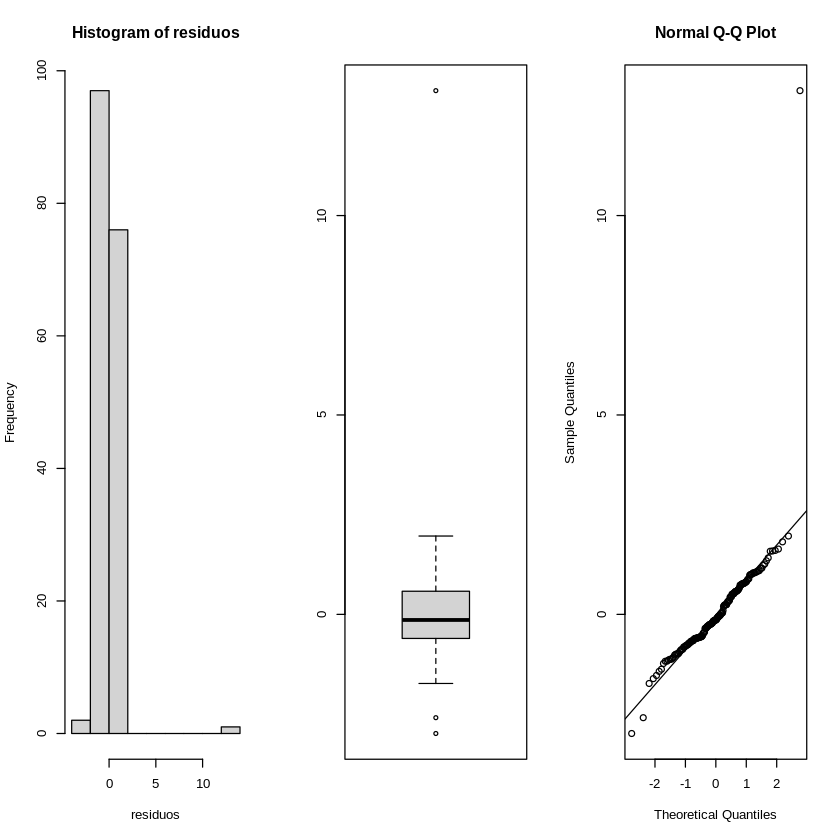

In [ ]:
residuos<-rstandard(reg.imc) # residuos estándares del modelo ajustado (completo) 
par(mfrow=c(1,3)) # divide la ventana en una fila y tres columnas 
hist(residuos) # histograma de los residuos estandarizados 
boxplot(residuos) # diagrama de cajas de los residuos estandarizados 
qqnorm(residuos) # gráfico de cuantiles de los residuos estandarizados 
qqline(residuos)  
par(mfrow=c(1,1)) # devuelve la pantalla a su estado original

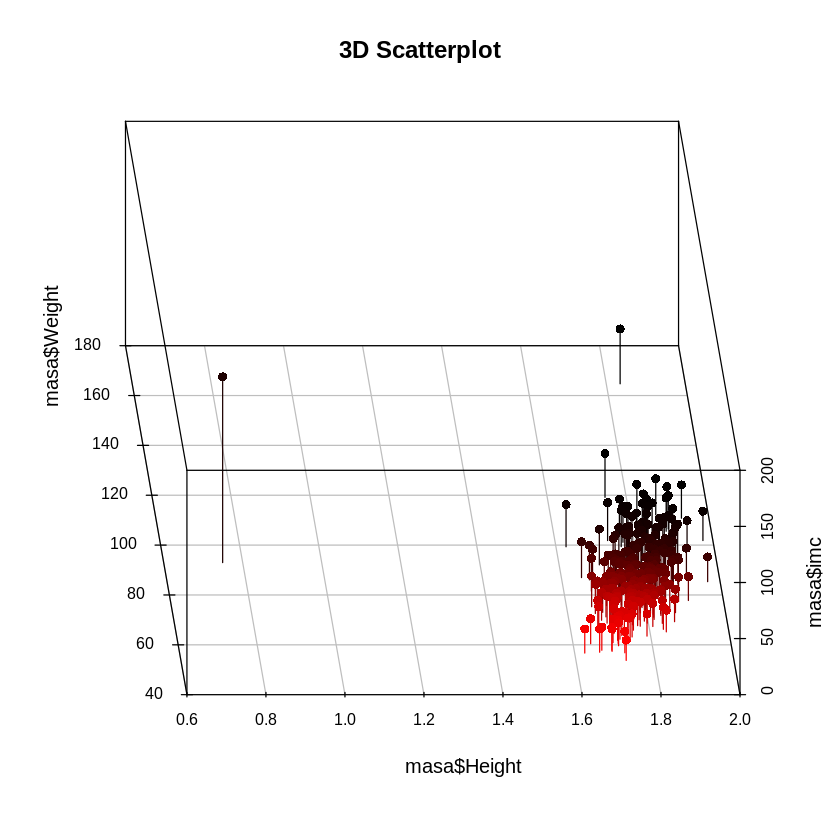

In [ ]:
library("scatterplot3d")
library("rgl")
s3d<-scatterplot3d(masa$Height, masa$Weight ,masa$imc,  pch=16, highlight.3d = TRUE, type="h",main="3D Scatterplot", angle = 100)
#s3d$plane3d(reg.mpg)
s3d$plane3d(reg.imc, lty.box = "solid")

##Modelo de mineria de datos

In [ ]:
test$Prediccion <- predict(reg.imc, newdata = test)
str(test)

masas<-test[test$imc>=test$Prediccion,]
masas

masass2<-test[test$imc<=test$Prediccion,]
str(masass2)


'data.frame':	76 obs. of  5 variables:
 $ BodyFat   : num  12.4 7.1 20.8 20.9 22.9 19.1 15.6 14 7.9 3.7 ...
 $ Height    : num  1.84 1.89 1.77 1.68 1.8 ...
 $ Weight    : num  79.8 84.5 81.9 73.8 94.9 ...
 $ imc       : num  23.5 23.6 26.3 26.3 29.2 ...
 $ Prediccion: num  19.7 17.1 27.9 32.5 30.6 ...


BodyFat Height  Weight    imc      Prediccion
8   12.4    1.84150  79.83219 23.54153 19.70791  
11   7.1    1.89230  84.48151 23.59292 17.13058  
31  11.9    1.87325  82.55374 23.52585 18.00823  
33  11.8    1.80975  76.20346 23.26685 20.97018  
46  13.9    1.86055  74.50249 21.52227 15.33103  
70  12.9    1.81610  71.10055 21.55725 17.90741  
71  24.3    1.81610  75.97666 23.03566 20.25846  
79  21.5    1.78435  73.14171 22.97233 21.90346  
83  18.4    1.84785  86.29588 25.27299 22.22203  
89   8.3    1.84150  80.17239 23.64184 19.87193  
93   8.5    1.79070  74.95608 23.37551 22.17589  
100 22.2    1.82880  89.35762 26.71771 25.50539  
102 20.4    1.82880  78.81161 23.56448 20.42058  
103 20.1    1.80975  78.35802 23.92469 22.00902  
108 18.3    1.88595  92.19257 25.92004 21.45088  
132 22.7    1.79070  77.67763 24.22425 23.48810  
133 23.6    1.86055  89.35762 25.81362 22.49351  
139 22.4    1.80975  76.31685 23.30147 21.02486  
141 24.9    1.80340  80.17239 24.65135 23.48620  
145 10.3    1.96850  85.34333 22.02413 10.31758  
149  5.3    1.84150  65.20385 19.22781 12.65478  
152 19.6    1.89230 109.65587 30.62329 29.26851  
160 22.5    1.81610  80.39918 24.37654 22.39079  
161  9.4    1.83515  68.60579 20.37125 14.89742  
162 14.6    1.85420  88.90403 25.85880 22.87718  
176  9.9    1.75895  65.88424 21.29485 20.81374  
180 16.9    1.89230 106.48072 29.73658 27.73760  
182  0.0    1.72720  53.75065 18.01766 17.97537  
184 12.1    1.77165  72.23453 23.01383 22.67081  
187 23.6    1.88595 105.57354 29.68211 27.90258  
194 24.7    1.89865 101.94480 28.27973 24.94821  
206 16.6    1.85420  94.68733 27.54094 25.66563  
208 32.8    1.84150  88.45044 26.08294 23.86324  
213 19.5    1.82245  76.31685 22.97784 19.82010  
219 24.5    1.82245  90.37821 27.21150 26.59985  
221 12.4    1.79070  69.51297 21.67805 19.55147  
233 15.4    1.81610  79.60540 24.13587 22.00807

'data.frame':	39 obs. of  5 variables:
 $ BodyFat   : num  20.8 20.9 22.9 19.1 15.6 14 7.9 3.7 32.3 40.1 ...
 $ Height    : num  1.77 1.68 1.8 1.73 1.73 ...
 $ Weight    : num  81.9 73.8 94.9 81.2 63.6 ...
 $ imc       : num  26.3 26.3 29.2 27.2 21.2 ...
 $ Prediccion: num  27.9 32.5 30.6 31.2 22.1 ...


In [ ]:
length(test$Prediccion)
length(test$imc)

[1] 76

[1] 76

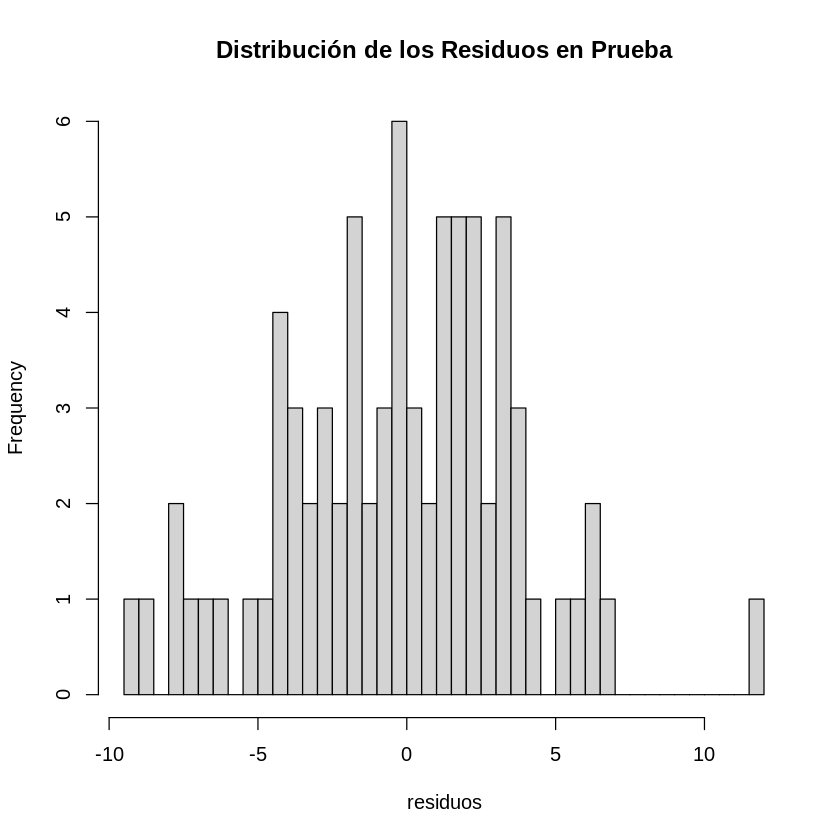

In [ ]:
hist(test$imc - test$Prediccion, 
     breaks = 50,
     main = 'Distribución de los Residuos en Prueba',
     xlab = 'residuos')

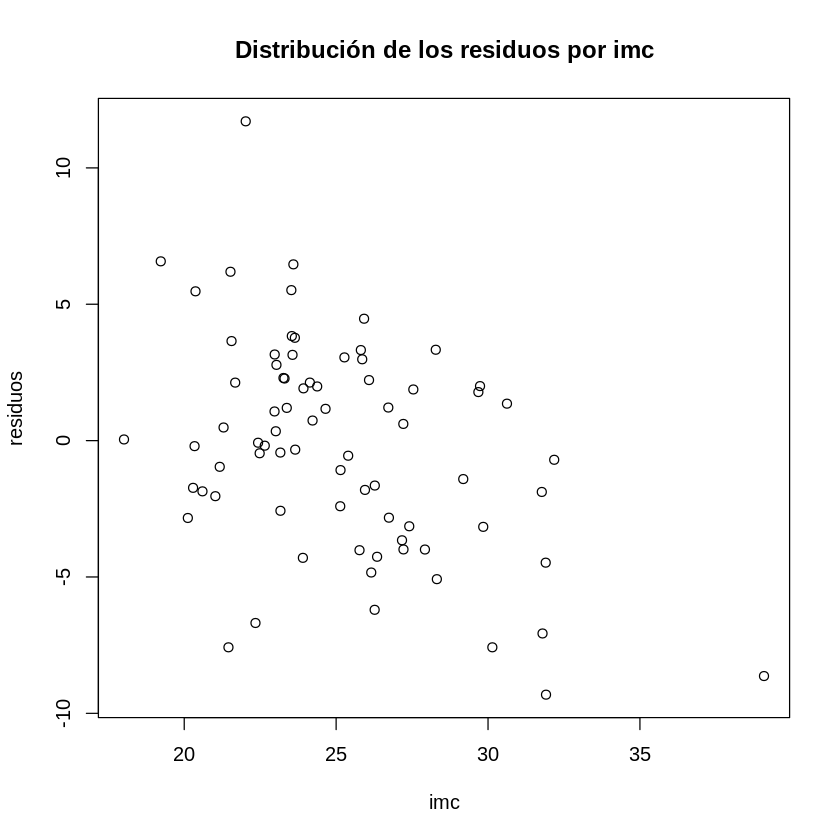

In [ ]:
plot(y = test$imc - test$Prediccion,
     x = test$imc,
     main = 'Distribución de los residuos por imc',
     xlab = 'imc',
     ylab = 'residuos')

In [ ]:
valoresApredecir <- data.frame(Height=1.72, Weight=70)
valoresApredecir.prediccion <-predict(reg.imc, newdata = valoresApredecir)
valoresApredecir.prediccion

1 
26.49307

##Resultados
El modelo puede ser usado para predecir la masa corporal de un paciente. El cual toma la altura y el peso como referencia, para calcular el indice de masa corporal.

In [ ]:
MODEL_SAVE_PATH = "MasaCorporal"
DEP_LIBS = c("caTools","ggplot2","scatterplot3d","rgl")

# save
model_rds_path = paste(MODEL_SAVE_PATH, ".rds",sep='')
model_dep_path = paste(MODEL_SAVE_PATH, ".dep",sep='')

# save model
saveRDS(reg.imc, model_rds_path)

# save dependency list
file_conn <- file(model_dep_path)
writeLines(DEP_LIBS, file_conn)
close(file_conn)